# 1. Limpieza de Datos:
Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [1]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# 1. Cargar el dataset
df = pd.read_csv('../Data/diabetes.csv')  
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Limpieza de datos
# a. Identificar y eliminar duplicados
print(f'Duplicados: {df.duplicated().sum()}')
df.drop_duplicates(inplace=True)

# b. Verificar tipos de datos
print(df.info())

Duplicados: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pregnancies                768 non-null    int64  
 1   Glucose                    768 non-null    int64  
 2   BloodPressure              768 non-null    int64  
 3   SkinThickness              768 non-null    int64  
 4   Insulin                    768 non-null    int64  
 5   BMI                        768 non-null    float64
 6   DiabetesPedigreeFunction   768 non-null    float64
 7   Age                        768 non-null    int64  
 8   Outcome                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
# Verificar las columnas
print(df.columns)

# Eliminar espacios adicionales en los nombres de las columnas (si existen)
df.columns = df.columns.str.strip()

# Reemplazar ceros inapropiados en las columnas clave con NaN
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Verificar si todas las columnas están presentes
for col in cols_with_missing:
    if col in df.columns:
        df[col] = df[col].replace(0, np.nan)
    else:
        print(f"Columna {col} no encontrada.")

# Imputar valores faltantes con la mediana
for col in cols_with_missing:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Verificar valores faltantes después de la imputación
print(f'Valores faltantes tras imputación:\n{df.isnull().sum()}')


Index(['Pregnancies ', 'Glucose ', 'BloodPressure ', 'SkinThickness ',
       'Insulin ', 'BMI  ', 'DiabetesPedigreeFunction ', 'Age ', 'Outcome'],
      dtype='object')
Valores faltantes tras imputación:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Pregnancies,6.000,1.000,8.000,1.000,0.000,5.000,3.000,10.000,2.000,8.000
Glucose,148.000,85.000,183.000,89.000,137.000,116.000,78.000,115.000,197.000,125.000
BloodPressure,72.000,66.000,64.000,66.000,40.000,74.000,50.000,72.000,70.000,96.000
SkinThickness,35.000,29.000,29.000,23.000,35.000,29.000,32.000,29.000,45.000,29.000
Insulin,125.000,125.000,125.000,94.000,168.000,125.000,88.000,125.000,543.000,125.000
BMI,33.600,26.600,23.300,28.100,43.100,25.600,31.000,35.300,30.500,32.300
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288,0.201,0.248,0.134,0.158,0.232
Age,50.000,31.000,32.000,21.000,33.000,30.000,26.000,29.000,53.000,54.000
Outcome,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000


# 2. Exploración de Datos:
Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.


In [6]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min    

In [7]:
# Medidas de tendencia central (media, mediana, moda) y dispersión
for col in df.columns:
    print(f"\n{col} - Media: {df[col].mean()}, Mediana: {df[col].median()}, Moda: {df[col].mode()[0]}")
    print(f"Rango: {df[col].max() - df[col].min()}, Desviación estándar: {df[col].std()}")


Pregnancies - Media: 3.8450520833333335, Mediana: 3.0, Moda: 1
Rango: 17, Desviación estándar: 3.3695780626988623

Glucose - Media: 121.65625, Mediana: 117.0, Moda: 99.0
Rango: 155.0, Desviación estándar: 30.43828582241517

BloodPressure - Media: 72.38671875, Mediana: 72.0, Moda: 72.0
Rango: 98.0, Desviación estándar: 12.096641733978139

SkinThickness - Media: 29.108072916666668, Mediana: 29.0, Moda: 29.0
Rango: 92.0, Desviación estándar: 8.791221023089737

Insulin - Media: 140.671875, Mediana: 125.0, Moda: 125.0
Rango: 832.0, Desviación estándar: 86.383059693181

BMI - Media: 32.45520833333333, Mediana: 32.3, Moda: 32.3
Rango: 48.89999999999999, Desviación estándar: 6.875176818080996

DiabetesPedigreeFunction - Media: 0.47187630208333325, Mediana: 0.3725, Moda: 0.254
Rango: 2.342, Desviación estándar: 0.33132859501277484

Age - Media: 33.240885416666664, Mediana: 29.0, Moda: 22
Rango: 60, Desviación estándar: 11.76023154067868

Outcome - Media: 0.3489583333333333, Mediana: 0.0, Moda:

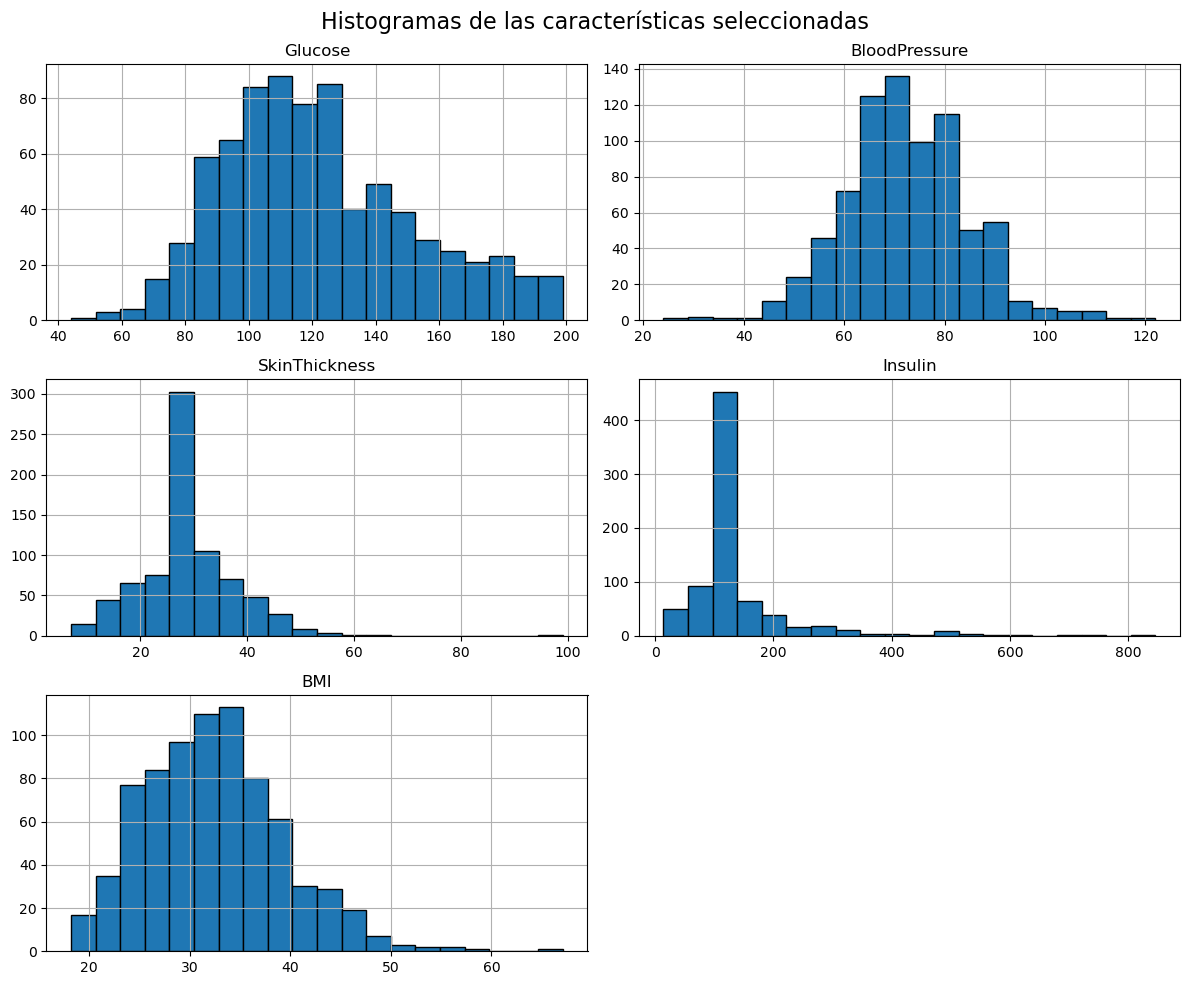

In [8]:
# Histogramas 
columns_to_plot = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Filtrar columnas específicas y generar histogramas
df[columns_to_plot].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Histogramas de las características seleccionadas', fontsize=16)
plt.tight_layout()
plt.show()


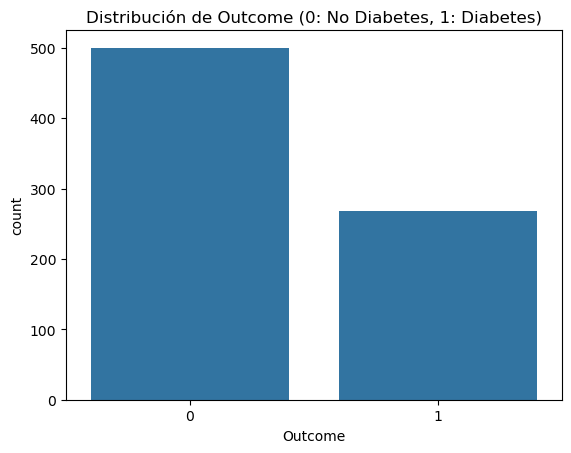

In [9]:
# 2. Gráficos de barras para columnas categóricas (en este caso, la variable 'Outcome')
sns.countplot(x='Outcome', data=df)
plt.title('Distribución de Outcome (0: No Diabetes, 1: Diabetes)')
plt.show()

Hay un mayor numero de mujeres sin diabetes que con diabetes mostrando asi una distribucion desbalanceada.

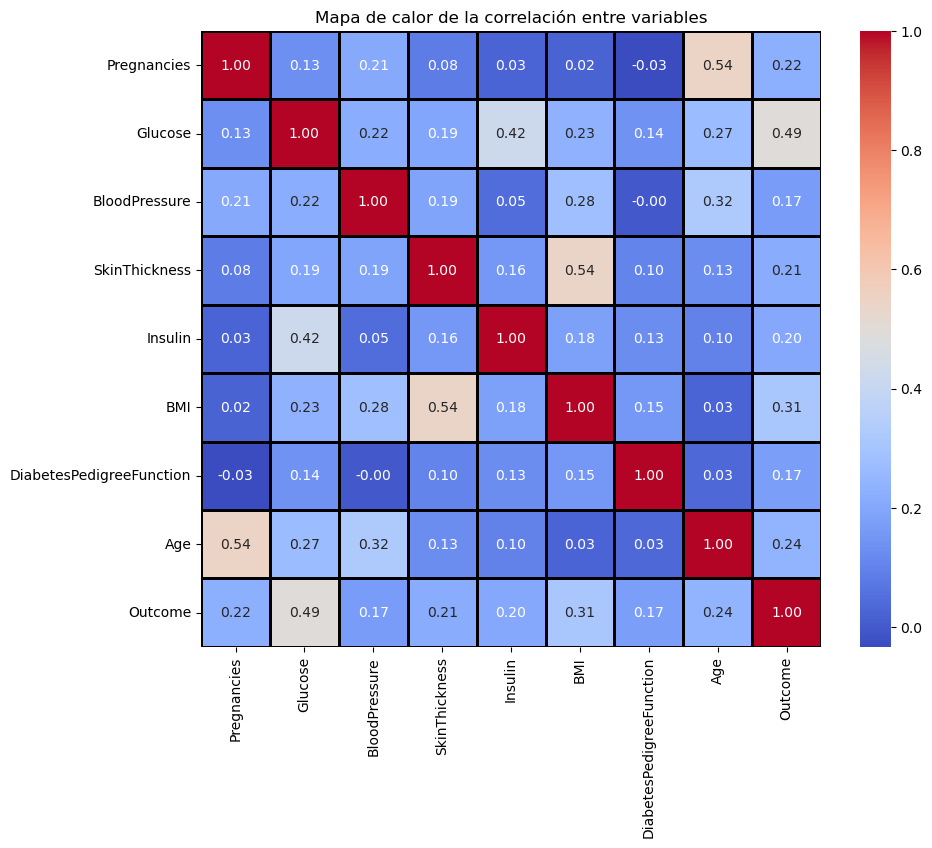

In [11]:
# 4. Mapa de calor de correlación entre las variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Mapa de calor de la correlación entre variables')
plt.show()


En resumen, el mapa de calor revela las relaciones más significativas entre las variables, siendo las más destacadas la correlación entre glucosa e insulina con el resultado (presencia de diabetes). Las variables como edad y embarazos también muestran algunas asociaciones relevantes, mientras que otras como la presión arterial y el pedigrí de diabetes tienen correlaciones más débiles.

# 3. Implementación de Modelos:
Modelos de Clasificación: Implementa modelos de Random Forest y XGBoost.
Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.


In [12]:
# Preparar los datos para el modelado
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Cálculo de métricas para Random Forest
accuracy_rf = accuracy_score(y_test, rf_pred)
precision_rf = precision_score(y_test, rf_pred)
recall_rf = recall_score(y_test, rf_pred)
f1_rf = f1_score(y_test, rf_pred)
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print(f"Accuracy (Random Forest): {accuracy_rf}")
print(f"Precision (Random Forest): {precision_rf}")
print(f"Recall (Random Forest): {recall_rf}")
print(f"F1-Score (Random Forest): {f1_rf}")
print(f"ROC-AUC (Random Forest): {roc_auc_rf}\n")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

Accuracy (Random Forest): 0.7337662337662337
Precision (Random Forest): 0.625
Recall (Random Forest): 0.6363636363636364
F1-Score (Random Forest): 0.6306306306306306
ROC-AUC (Random Forest): 0.8340679522497705



In [15]:
# Modelo XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# Cálculo de métricas para XGBoost
accuracy_xgb = accuracy_score(y_test, xgb_pred)
precision_xgb = precision_score(y_test, xgb_pred)
recall_xgb = recall_score(y_test, xgb_pred)
f1_xgb = f1_score(y_test, xgb_pred)
roc_auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))
print(f"Accuracy (XGBoost): {accuracy_xgb}")
print(f"Precision (XGBoost): {precision_xgb}")
print(f"Recall (XGBoost): {recall_xgb}")
print(f"F1-Score (XGBoost): {f1_xgb}")
print(f"ROC-AUC (XGBoost): {roc_auc_xgb}\n")

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        99
           1       0.59      0.67      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154

Accuracy (XGBoost): 0.7142857142857143
Precision (XGBoost): 0.5873015873015873
Recall (XGBoost): 0.6727272727272727
F1-Score (XGBoost): 0.6271186440677966
ROC-AUC (XGBoost): 0.7827364554637282



In [16]:
# Crear un diccionario con las métricas de los cuatro modelos
metrics = {
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_rf, accuracy_xgb],
    'Precision': [precision_rf, precision_xgb],  
    'Recall': [recall_rf, recall_xgb],  
    'F1-Score': [f1_rf, f1_xgb],
    'ROC-AUC': [roc_auc_rf, roc_auc_xgb]
}

# Crear un DataFrame para mostrar la comparación
df_comparison = pd.DataFrame(metrics)
# Mostrar el DataFrame con las métricas de comparación
print(df_comparison)

           Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Random Forest  0.733766   0.625000  0.636364  0.630631  0.834068
1        XGBoost  0.714286   0.587302  0.672727  0.627119  0.782736


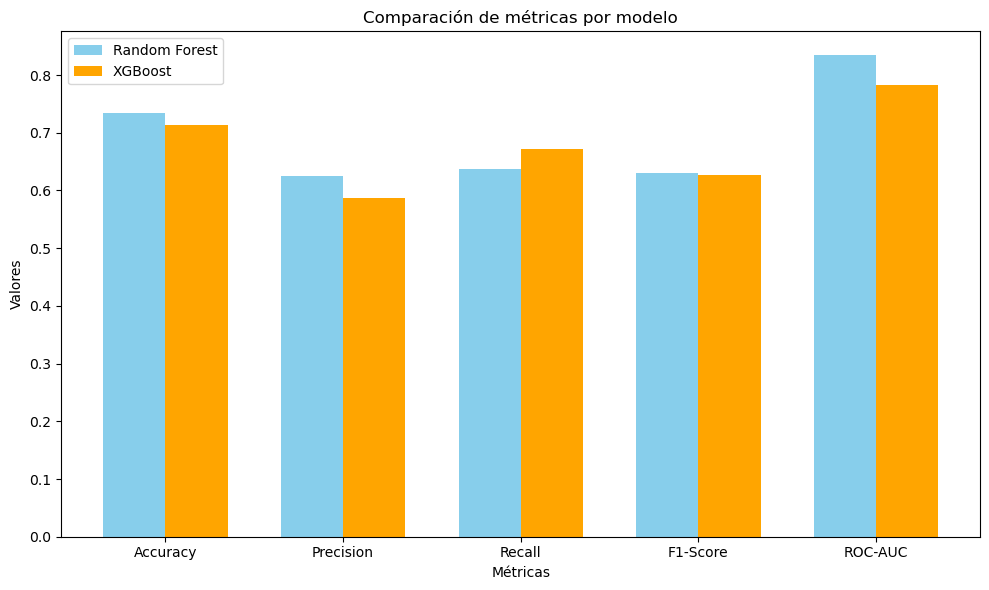

In [18]:
# Crear datos correctamente
models = metrics['Model']
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
values = [metrics['Accuracy'], metrics['Precision'], metrics['Recall'], metrics['F1-Score'], metrics['ROC-AUC']]
values_rf = [metrics['Accuracy'][0], metrics['Precision'][0], metrics['Recall'][0], metrics['F1-Score'][0], metrics['ROC-AUC'][0]]
values_xgb = [metrics['Accuracy'][1], metrics['Precision'][1], metrics['Recall'][1], metrics['F1-Score'][1], metrics['ROC-AUC'][1]]

# Configurar posición y ancho de barras
x = np.arange(len(metrics_names))  # Posiciones para las métricas
width = 0.35  # Ancho de las barras

# Crear gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, values_rf, width, label=models[0], color='skyblue')
ax.bar(x + width/2, values_xgb, width, label=models[1], color='orange')

# Configuración del gráfico
ax.set_xlabel('Métricas')
ax.set_ylabel('Valores')
ax.set_title('Comparación de métricas por modelo')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()
plt.tight_layout()

# Mostrar gráfico
plt.show()

Este gráfico proporciona una comparación rápida de cómo se desempeñan las metricas de los modelos, donde el valor más alto indica un mejor rendimiento que seria el Random Forest con la metrica ROC-AUC.

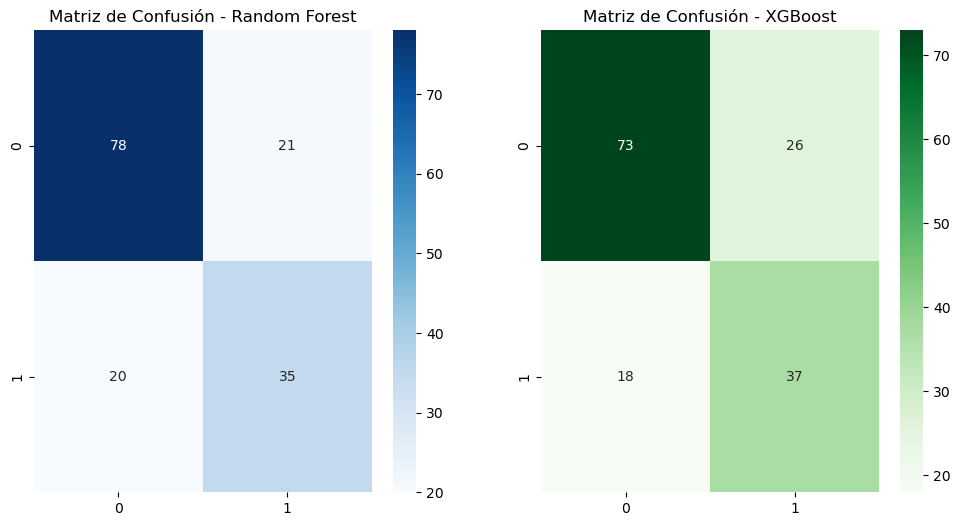

In [19]:
# Matriz de confusión
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Random Forest')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión - XGBoost')

plt.show()

Conclusión Visual
Random Forest es mejor identificando correctamente a quienes no tienen diabetes y comete menos errores al diagnosticar falsamente la enfermedad.
XGBoost es mejor para identificar a quienes sí tienen diabetes, reduciendo los casos en los que la enfermedad pasa desapercibida.
Elección del Modelo
Si es más importante evitar falsos positivos (diagnosticar diabetes en alguien que no la tiene), elige Random Forest.
Si es más importante evitar falsos negativos (no diagnosticar diabetes en alguien que la tiene), elige XGBoost.
Ambos modelos son útiles, pero su elección depende de las prioridades del sistema médico o del impacto de los errores en este contexto.